# NeuralSymbolic - Demo

## Dependencies

In [2]:
import tqdm
import numpy as np
import pandas as pd
from sklearn.model_selection import LeaveOneOut, KFold
import keras 
from keras.models import Sequential, Model
from keras.layers import Dense, Input, concatenate
from keras.losses import binary_crossentropy
from keras.utils.vis_utils import plot_model
!pip install keras-rectified-adam
from keras_radam import RAdam
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [61]:
# import tensorflow v1 compatibility mode
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# 5. Configure a new global `tensorflow` session
from keras import backend as K
session_conf = tf.ConfigProto(intra_op_parallelism_threads=4, inter_op_parallelism_threads=4)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [ ]:
seed_value= 0

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set `tensorflow` pseudo-random generator at a fixed value
tf.set_random_seed(seed_value)

# Download database

In [49]:
# download database (10 samples)
#!curl https://transfer.sh/DOJolD/database.csv -o database.csv 
!curl https://transfer.sh/N9NOEu/databaseIA.txt -o database1.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1929  100  1929    0     0   3167      0 --:--:-- --:--:-- --:--:--  3162
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1218  100  1218    0     0   1990      0 --:--:-- --:--:-- --:--:--  1990


## Show database

In [55]:
#Read database from database.txt file
df = pd.read_csv("database1.txt", ',')
df

,Number_of_cars,Number_of_different_loads,num_wheels1,length1,shape1,num_loads1,load_shape1,num_wheels2,length2,shape2,...,Rectangle_next_to_triangle,Rectangle_next_to_hexagon,Rectangle_next_to_circle,Triangle_next_to_triangle,Triangle_next_to_hexagon,Triangle_next_to_circle,Hexagon_next_to_hexagon,Hexagon_next_to_circle,Circle_next_to_circle,Class_attribute
0,5,4,2,1,6,3,2,2,0,8,...,1,0,0,0,1,0,0,1,0,1
1,4,3,2,0,9,1,3,2,0,7,...,1,0,1,0,0,0,0,0,0,1
2,4,2,2,0,6,1,0,2,0,4,...,0,0,0,1,0,1,0,0,0,1
3,5,2,2,0,7,1,3,2,0,1,...,1,0,0,1,0,0,0,0,0,1
4,4,3,2,0,1,1,3,3,1,0,...,1,0,1,0,0,0,0,0,0,1
5,3,2,2,1,0,3,0,2,0,6,...,0,0,0,0,0,1,0,0,0,0
6,4,2,2,0,1,1,0,2,0,9,...,0,0,0,0,0,1,0,0,0,0
7,3,2,3,1,0,1,2,2,0,9,...,0,0,1,0,0,0,0,0,0,0
8,5,2,2,0,7,1,0,2,1,5,...,0,0,1,0,0,0,0,0,0,0
9,3,1,2,0,9,1,2,2,1,6,...,0,0,0,0,0,0,0,0,0,0


## Question 1.

Implemente uma solução que implemente proposicionalização com 32 features
de entrada, 9 perceptrons e uma única saída (denotando leste). As entradas codificam:

### Akin Propositionalization Model

In [57]:
# Atrributes matrix
Y = np.array(df.pop('Class_attribute'))

# Results vector
X = np.array(df)

# define model structure
def model_v1():
  model = Sequential([
    Dense(5, activation='relu', input_shape=(32,)),
    # sigmoid is used for binary classification
    Dense(1, activation='sigmoid'),
  ])
  model.compile(
    loss = binary_crossentropy, 
    optimizer = RAdam(),
    metrics = ['mse']
  ) 
  return model

model = model_v1()
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_154 (Dense)           (None, 5)                 165       
                                                                 
 dense_155 (Dense)           (None, 1)                 6         
                                                                 
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


### Train

In [83]:
hists = dict()

q1_names =  [
  'Train', 
  'Output of flat network', 
  'Desired output', 
  'Class'
]

# Validation method leaveoneout from sklearn
# reference https://www.statology.org/leave-one-out-cross-validation-in-python/
loo = LeaveOneOut()

q1 = {name: [] for name in q1_names}

for i, (train, test) in tqdm.tqdm(enumerate(loo.split(X)), total=10):
  # train-test division
  x_train, y_train = X[train],Y[train]
  x_test, y_test = X[test], Y[test]

  model = model_v1()
  hist = model.fit(
    x_train,
    y_train,
    validation_data=[x_test, y_test],
    # 1250 had the best results
    epochs=1250,
    verbose=0,
  )

  # saving the model to print results later
  hists[test[0]] = hist

  q1['Train'].append(i)
  q1['Output of flat network'].append(model.predict(x_test)[0][0])
  q1['Desired output'].append(y_test[0])
  q1['Class'].append(str_att['Class_attribute'][int(y_test)])

100%|██████████| 10/10 [05:21<00:00, 32.13s/it]


### Results

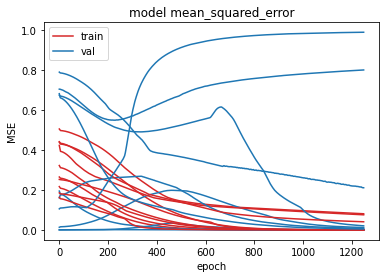

In [85]:
# Show MSE per model
for i,history in enumerate(hists.values()):
  plt.plot(history.history['mean_squared_error'], c='tab:red')
  plt.plot(history.history['val_mean_squared_error'], c='tab:blue')
  
plt.title('model mean_squared_error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [87]:
t1 = pd.DataFrame.from_dict(q1).round(2)
t1["result"] = round(t1["Output of flat network"])==t1["Desired output"]
t1

,Train,Output of flat network,Desired output,Class,result
0,0,0.11,1,east,False
1,1,0.97,1,east,True
2,2,0.89,1,east,True
3,3,1.00,1,east,True
4,4,1.00,1,east,True
5,5,0.09,0,west,True
6,6,0.14,0,west,True
7,7,0.46,0,west,True
8,8,0.99,0,west,False
9,9,0.07,0,west,True


## Question 2.

Implemente uma solução com base no modelo de aprendizado relacional contendo meta-redes para conectar conceitos das premissas. Este modelos deve conter 11 redes, uma para cada um dos seguintes conceitos conforme definição das paginas 136 e 137:

### metanet

In [13]:
def model_v2():
  # features
  t   = Input(shape=(1,), name='t')
  c   = Input(shape=(1,), name='c') 
  w   = Input(shape=(1,), name='w')
  l   = Input(shape=(1,), name='l')
  s   = Input(shape=(1,), name='s')
  nc  = Input(shape=(1,), name='nc')
  ls  = Input(shape=(1,), name='ls')
  nl  = Input(shape=(1,), name='nl')
  ncl = Input(shape=(1,), name='ncl')
  x_crc = Input(shape=(1,), name='x_crc')
  x_hex = Input(shape=(1,), name='x_hex')
  x_rec = Input(shape=(1,), name='x_rec')
  x_tri = Input(shape=(1,), name='x_tri')

  # num_cars(t,nc)
  num_cars_ = concatenate([t,nc])
  num_cars_ = Dense(20, activation='relu')(num_cars_)
  num_cars = Dense(1, activation='sigmoid', name='num_cars')(num_cars_)
  num_cars = Model(inputs=[t,nc], outputs=num_cars)

  # num_loads(t,nl)
  num_loads_ = concatenate([t,nl])
  num_loads_ = Dense(20, activation='relu')(num_loads_)
  num_loads = Dense(1, activation='sigmoid', name='num_loads')(num_loads_)
  num_loads = Model(inputs=[t,nl], outputs=num_loads)

  # num_wheels(t,c,w)
  num_wheels_ = concatenate([t,c,w])
  num_wheels_ = Dense(20, activation='relu')(num_wheels_)
  num_wheels = Dense(1, activation='sigmoid', name='num_wheels')(num_wheels_)
  num_wheels = Model(inputs=[t,c,w], outputs=num_wheels)

  # length(t,c,l)
  length_ = concatenate([t,c,l])
  length_ = Dense(20, activation='relu')(length_)
  length = Dense(1, activation='sigmoid', name='length')(length_)
  length = Model(inputs=[t,c,l], outputs=length)

  # shape(t,c,s)
  shape_ = concatenate([t,c,s])
  shape_ = Dense(20, activation='relu')(shape_)
  shape = Dense(1, activation='sigmoid', name='shape')(shape_)
  shape = Model(inputs=[t,c,s], outputs=shape)

  # num_car_loads(t,c,ncl)
  num_car_loads_ = concatenate([t,c,ncl])
  num_car_loads_ = Dense(20, activation='relu')(num_car_loads_)
  num_car_loads = Dense(1, activation='sigmoid', name='num_car_loads')(num_car_loads_)
  num_car_loads = Model(inputs=[t,c,ncl], outputs=num_car_loads)

  # load_shape(t,c,ls)
  load_shape_ = concatenate([t,c,ls])
  load_shape_ = Dense(20, activation='relu')(load_shape_)
  load_shape = Dense(1, activation='sigmoid', name='load_shape')(load_shape_)
  load_shape = Model(inputs=[t,c,ls], outputs=load_shape)

  # next_crc(t,c,x)
  next_crc_ = concatenate([t,c,x_crc])
  next_crc_ = Dense(20, activation='relu')(next_crc_)
  next_crc = Dense(1, activation='sigmoid', name='next_crc')(next_crc_)
  next_crc = Model(inputs=[t,c,x_crc], outputs=next_crc)

  # next_hex_(t,c,x)
  next_hex_ = concatenate([t,c,x_hex])
  next_hex_ = Dense(20, activation='relu')(next_hex_)
  next_hex = Dense(1, activation='sigmoid', name='next_hex')(next_hex_)
  next_hex = Model(inputs=[t,c,x_hex], outputs=next_hex)

  # next_rec(t,c,x)
  next_rec_ = concatenate([t,c,x_rec])
  next_rec_ = Dense(20, activation='relu')(next_rec_)
  next_rec = Dense(1, activation='sigmoid', name='next_rec')(next_rec_)
  next_rec = Model(inputs=[t,c,x_rec], outputs=next_rec)

  # next_tri(t,c,x)
  next_tri_ = concatenate([t,c,x_tri])
  next_tri_ = Dense(20, activation='relu')(next_tri_)
  next_tri = Dense(1, activation='sigmoid', name='next_tri')(next_tri_)
  next_tri = Model(inputs=[t,c,x_tri], outputs=next_tri)

  # east
  east = concatenate([
    num_cars_, 
    num_loads_, 
    num_wheels_,
    length_,
    shape_,
    num_car_loads_,
    load_shape_,
    next_crc_,
    next_hex_,
    next_rec_,
    next_tri_
  ])
  east = Dense(1, activation='relu')(east)
  east =  Dense(1, activation='sigmoid', name='east')(east)
  east = Model(inputs=[t, c, w, l, s, nc, ls, nl, ncl, x_crc, x_hex, x_rec, x_tri], outputs=east)
  
  # metanet
  metanet = Model(
    inputs=east.inputs, 
    outputs=[
      num_cars.output, 
      num_loads.output, 
      num_wheels.output,
      length.output,
      shape.output,
      num_car_loads.output,
      load_shape.output,
      next_crc.output,
      next_hex.output,
      next_rec.output,
      next_tri.output,
      east.output
  ])

  # rules
  rules = {
    'num_cars': num_cars, 
    'num_loads': num_loads, 
    'num_wheels': num_wheels,
    'length': length,
    'shape': shape,
    'num_car_loads': num_car_loads,
    'load_shape': load_shape,
    'next_crc': next_crc,
    'next_hex': next_hex,
    'next_rec': next_rec,
    'next_tri': next_tri,
  }

  return metanet, east, rules

metanet, east, rules = model_v2()
metanet.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 t (InputLayer)                 [(None, 1)]          0           []                               
                                                                                                  
 nc (InputLayer)                [(None, 1)]          0           []                               
                                                                                                  
 nl (InputLayer)                [(None, 1)]          0           []                               
                                                                                                  
 c (InputLayer)                 [(None, 1)]          0           []                               
                                                                                           

### Train

In [88]:
# transform data
df = read_data()
cols = [[c for c in df.columns if not(str.isdigit(c[-1])) or (str.isdigit(c[-1]) and int(c[-1])==n)] for n in range(1,5)]

data = [df[col] for col in cols]
for c, df in enumerate(data):
  df.columns = [name if not str.isdigit(name[-1]) else name[:-1] for name in df.columns]
  df['car'] = c+1

data = pd.concat(data)
data.reset_index(level=0, inplace=True)
data['train'] = data.pop('index')
data.T[0]

def get_att(X):
  t = X['train'].T
  c = X['car'].T
  w = X['num_wheels'].T
  l = X['length'].T
  s = X['shape'].T
  nc = X['Number_of_cars'].T
  ls = X['load_shape'].T
  nl = X['Number_of_different_loads'].T
  ncl = X['num_loads'].T
  x_crc = np.sum(X[[col for col in X if col.endswith('circle')]], axis=1).T
  x_hex = np.sum(X[[col for col in X if col.endswith('hexagon')]], axis=1).T
  x_rec = np.sum(X[[col for col in X if col.endswith('rectangle')]], axis=1).T
  x_tri = np.sum(X[[col for col in X if col.endswith('triangle')]], axis=1).T

  return [t, c, w, l, s, nc, ls, nl, ncl, x_crc, x_hex, x_rec, x_tri]

def split(data, val_train):
  x_train = data.query(f'train != {val_train}')
  x_test = data.query(f'train == {val_train}')
  y_train = np.array(x_train.pop('Class_attribute'))
  y_test = np.array(x_test.pop('Class_attribute'))
  x_train = get_att(x_train)
  x_test = get_att(x_test)
  return x_train, x_test, np.array(y_train), np.array(y_test)

kf = KFold(n_splits=10, shuffle=False)
hists = dict()
q2_names =  [
  'Train',
  'Output of flat network', 
  'Desired output', 
  'Class'
]
q2 = {name: [] for name in q2_names}

for val_train in tqdm.tqdm(range(0,10)):
  x_train, x_test, y_train, y_test = split(data, val_train)
  metanet, east, rules = model_v2()

  east.compile(
    loss = binary_crossentropy, 
    optimizer = RAdam(),
    metrics = ['mse', 'binary_accuracy'])
  hist = east.fit(
    x_train,
    y_train,
    validation_data=[x_test, y_test],
    epochs=1000,
    verbose=0,)
  hists[val_train] = hist

  q2['Train'].append(val_train)
  q2['Output of flat network'].append(east.predict(x_test)[0][0])
  q2['Desired output'].append(y_test[0])
  q2['Class'].append(str_att['Class_attribute'][int(y_test[0])])
  

100%|██████████| 10/10 [09:23<00:00, 56.33s/it]


### Results

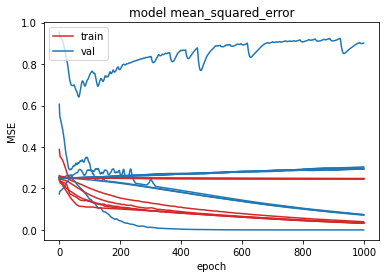

In [19]:
for i,history in enumerate(hists.values()):
  plt.plot(history.history['mean_squared_error'], c='tab:red')
  plt.plot(history.history['val_mean_squared_error'], c='tab:blue')
  
plt.title('model mean_squared_error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [89]:
t2 = pd.DataFrame.from_dict(q2).round(2)
t2['Cars Accuracy'] = [hists[i].history['binary_accuracy'][-1] for i in range(0,10)]
t2 = t2.reindex(columns=['Train', 'Output of flat network', 'Desired output', 'Class'])
t2["Result"] = round(t2["Output of flat network"])==t2["Desired output"]
t1
t2 

,Train,Output of flat network,Desired output,Class,Result
0,0,0.46,1,east,False
1,1,0.46,1,east,False
2,2,1.00,1,east,True
3,3,0.73,1,east,True
4,4,0.60,1,east,True
5,5,0.44,0,west,True
6,6,0.27,0,west,True
7,7,0.55,0,west,False
8,8,0.54,0,west,False
9,9,0.54,0,west,False
